In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [ ]:
df = pd.read_csv(r'C:\Users\manar\OneDrive\Documents\ENIT\Big-D\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (170366, 79)
Total rows: 170,366
Total columns: 79


In [ ]:

df.columns = df.columns.str.strip()

print("Sample column names after cleaning:")
print(df.columns[:5].tolist())

Sample column names after cleaning:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets']


Label Distribution:
Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64


Label Distribution (%):
Label
BENIGN                        98.720402
Web Attack � Brute Force       0.884566
Web Attack � XSS               0.382705
Web Attack � Sql Injection     0.012326
Name: proportion, dtype: float64


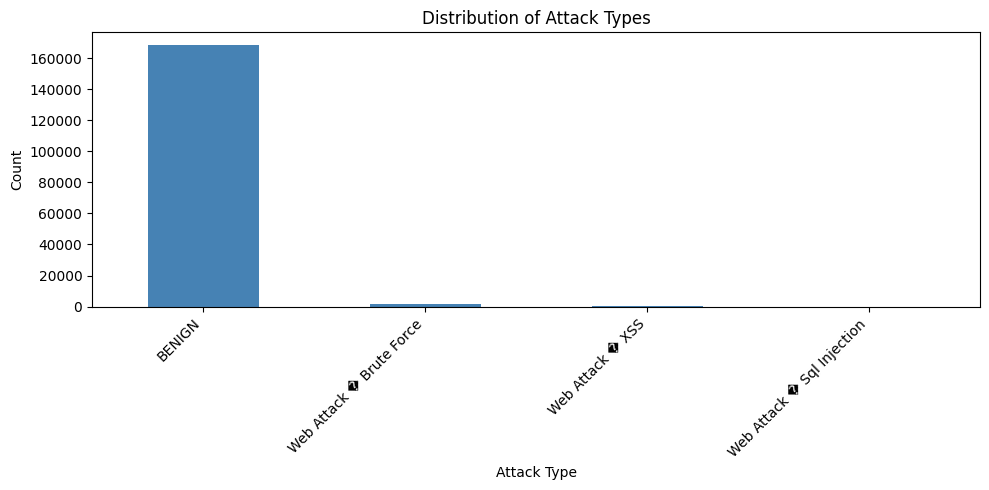

In [ ]:
print("Label Distribution:")
print(df['Label'].value_counts())
print("\n" + "="*50)

label_pct = df['Label'].value_counts(normalize=True) * 100
print("\nLabel Distribution (%):")
print(label_pct)


plt.figure(figsize=(10, 5))
df['Label'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['Label'] = df['Label'].str.replace('�', '-').str.strip()
print("Cleaned labels:")
print(df['Label'].value_counts())

print(f"\n{'='*50}")
print(f"Missing values before cleaning:")
missing = df.isnull().sum()
print(missing[missing > 0])

print(f"\nRows before: {len(df):,}")
df = df.dropna()
print(f"Rows after dropping missing: {len(df):,}")

print(f"\n{'='*50}")
print("Checking for infinity values...")
inf_cols = []
for col in df.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        inf_cols.append(col)
        print(f"  {col}: {inf_count} infinite values")

if inf_cols:
    print(f"\nReplacing infinity values in {len(inf_cols)} columns...")
    for col in inf_cols:
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        df[col] = df[col].fillna(df[col].median())
    print("✓ Infinity values handled")
else:
    print("✓ No infinity values found")

print(f"\n{'='*50}")
print("✓ Data cleaning complete!")
print(f"Final dataset shape: {df.shape}")

Cleaned labels:
Label
BENIGN                        168186
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Web Attack - Sql Injection        21
Name: count, dtype: int64

Missing values before cleaning:
Flow Bytes/s    20
dtype: int64

Rows before: 170,366
Rows after dropping missing: 170,346

Checking for infinity values...
  Flow Bytes/s: 115 infinite values
  Flow Packets/s: 115 infinite values

Replacing infinity values in 2 columns...
✓ Infinity values handled

✓ Data cleaning complete!
Final dataset shape: (170346, 79)


In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nLabel encoding:")
for i, label in enumerate(le.classes_):
    print(f"  {i}: {label}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTrain set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data prepared for machine learning!")

Features shape: (170346, 78)
Target shape: (170346,)

Label encoding:
  0: BENIGN
  1: Web Attack - Brute Force
  2: Web Attack - Sql Injection
  3: Web Attack - XSS

Train set: 136,276 samples
Test set: 34,070 samples

✓ Data prepared for machine learning!


In [ ]:
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print("\n" + "="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Training Logistic Regression...

LOGISTIC REGRESSION RESULTS

Accuracy: 0.9918

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     33634
  Web Attack - Brute Force       0.53      0.85      0.66       302
Web Attack - Sql Injection       0.00      0.00      0.00         4
          Web Attack - XSS       0.60      0.02      0.04       130

                  accuracy                           0.99     34070
                 macro avg       0.53      0.47      0.42     34070
              weighted avg       0.99      0.99      0.99     34070



In [ ]:
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\n" + "="*60)
print("DECISION TREE RESULTS")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Training Decision Tree...

DECISION TREE RESULTS

Accuracy: 0.9958

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     33634
  Web Attack - Brute Force       0.71      0.93      0.81       302
Web Attack - Sql Injection       0.60      0.75      0.67         4
          Web Attack - XSS       0.45      0.12      0.18       130

                  accuracy                           1.00     34070
                 macro avg       0.69      0.70      0.66     34070
              weighted avg       1.00      1.00      0.99     34070



In [ ]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n" + "="*60)
print("RANDOM FOREST RESULTS")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Training Random Forest...

RANDOM FOREST RESULTS

Accuracy: 0.9957

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     33634
  Web Attack - Brute Force       0.72      0.91      0.80       302
Web Attack - Sql Injection       0.67      0.50      0.57         4
          Web Attack - XSS       0.40      0.11      0.17       130

                  accuracy                           1.00     34070
                 macro avg       0.70      0.63      0.64     34070
              weighted avg       0.99      1.00      0.99     34070




MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.991752   0.992584 0.991752  0.990834
      Decision Tree  0.995773   0.995033 0.995773  0.994886
      Random Forest  0.995715   0.994696 0.995715  0.994784


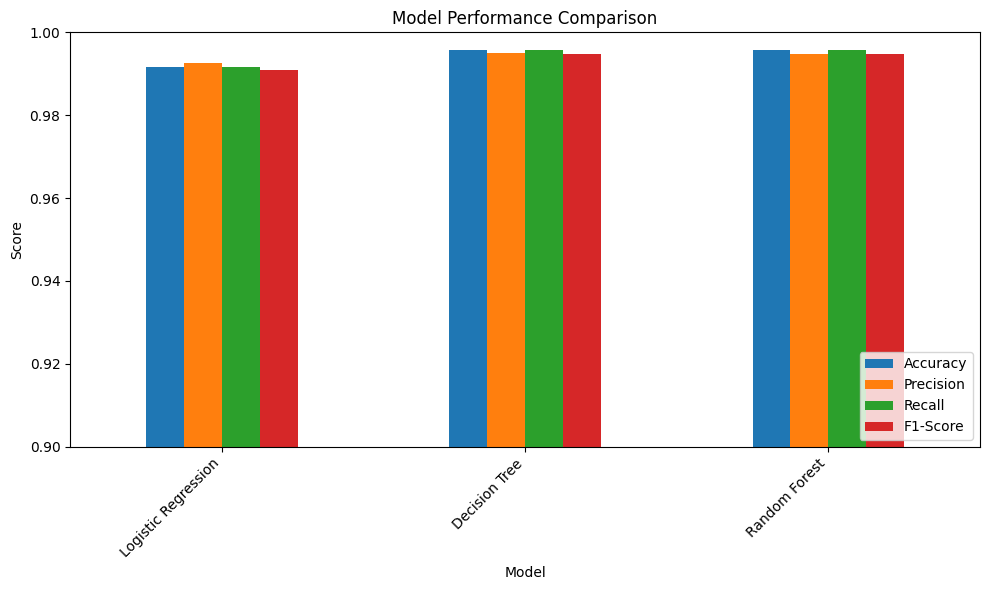

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_lr, y_pred_dt, y_pred_rf]

results = []
for model_name, y_pred in zip(models, predictions):
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(results_df.to_string(index=False))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0.9, 1.0)  
plt.tight_layout()
plt.show()

Top 20 Most Important Features:
                        feature  importance
24                  Fwd IAT Min    0.120275
67      Init_Win_bytes_backward    0.080462
19                 Flow IAT Min    0.074700
36                Fwd Packets/s    0.054076
16                Flow IAT Mean    0.038368
0              Destination Port    0.034141
21                 Fwd IAT Mean    0.033831
15               Flow Packets/s    0.033353
22                  Fwd IAT Std    0.028914
34            Fwd Header Length    0.027506
55          Fwd Header Length.1    0.027044
4   Total Length of Fwd Packets    0.026588
18                 Flow IAT Max    0.025200
66       Init_Win_bytes_forward    0.025127
52          Average Packet Size    0.023767
40           Packet Length Mean    0.022123
63            Subflow Fwd Bytes    0.021675
39            Max Packet Length    0.021604
17                 Flow IAT Std    0.021517
23                  Fwd IAT Max    0.021039


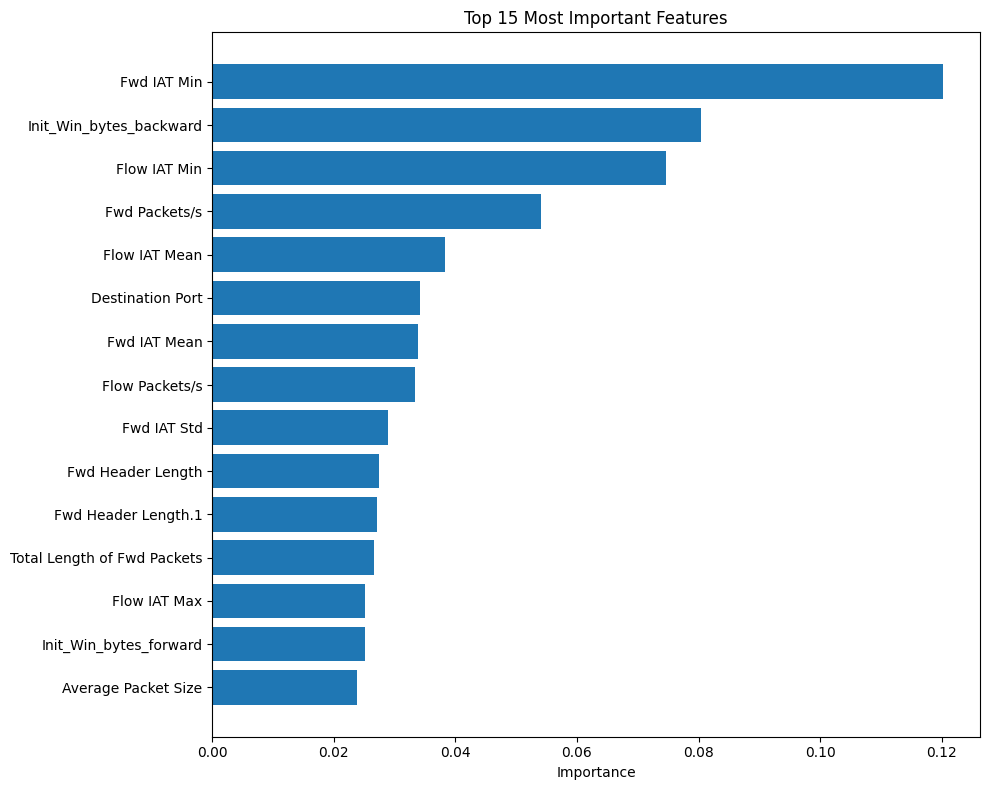

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance.head(20))

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

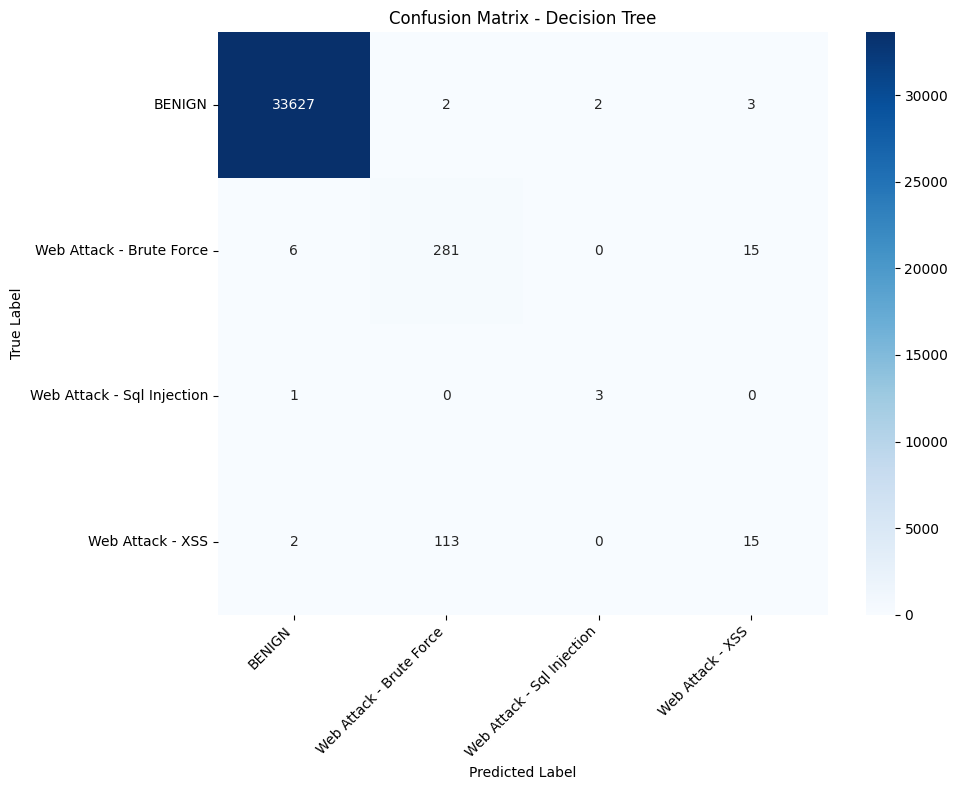


Confusion Matrix Analysis:
True Positives (BENIGN correctly identified): 33627
Brute Force correctly detected: 281 out of 302
XSS correctly detected: 15 out of 130


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print(f"True Positives (BENIGN correctly identified): {cm[0,0]}")
print(f"Brute Force correctly detected: {cm[1,1]} out of {cm[1].sum()}")
print(f"XSS correctly detected: {cm[3,3]} out of {cm[3].sum()}")

In [19]:
print("="*70)
print("PROJECT SUMMARY - CICIDS2017 Network Intrusion Detection")
print("="*70)

summary = f"""
* DATASET:
- Total samples: {len(df):,}
- Features: {X.shape[1]}
- Classes: 4 (Benign, Brute Force, XSS, SQL Injection)
- Highly imbalanced: 98.7% benign traffic

* MODELS TESTED:
1. Logistic Regression: 99.18% accuracy
2. Decision Tree: 99.58% accuracy (BEST)
3. Random Forest: 99.57% accuracy

* STRENGTHS:
- Excellent at identifying normal traffic (99.98% recall)
- Strong Brute Force detection (93% recall)
- Fast training and prediction times

* WEAKNESSES:
- Poor XSS detection (11.5% recall)
- XSS attacks confused with Brute Force (87% misclassified)
- Class imbalance inflates overall accuracy

* KEY FINDINGS:
- Timing features (IAT) are most important for detection
- Tree-based models outperform linear models
- Need class balancing techniques for production use

* RECOMMENDATIONS FOR IMPROVEMENT:
1. Apply SMOTE or class weights to handle imbalance
2. Feature engineering for XSS-specific patterns
3. Ensemble methods with custom thresholds per class
4. Collect more XSS and SQL Injection samples
"""

print(summary)

PROJECT SUMMARY - CICIDS2017 Network Intrusion Detection

* DATASET:
- Total samples: 170,346
- Features: 78
- Classes: 4 (Benign, Brute Force, XSS, SQL Injection)
- Highly imbalanced: 98.7% benign traffic

* MODELS TESTED:
1. Logistic Regression: 99.18% accuracy
2. Decision Tree: 99.58% accuracy (BEST)
3. Random Forest: 99.57% accuracy

* STRENGTHS:
- Excellent at identifying normal traffic (99.98% recall)
- Strong Brute Force detection (93% recall)
- Fast training and prediction times

* WEAKNESSES:
- Poor XSS detection (11.5% recall)
- XSS attacks confused with Brute Force (87% misclassified)
- Class imbalance inflates overall accuracy

* KEY FINDINGS:
- Timing features (IAT) are most important for detection
- Tree-based models outperform linear models
- Need class balancing techniques for production use

* RECOMMENDATIONS FOR IMPROVEMENT:
1. Apply SMOTE or class weights to handle imbalance
2. Feature engineering for XSS-specific patterns
3. Ensemble methods with custom thresholds p